### 2. [신경망 학습](https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98-%ED%8F%89%EA%B7%A0%EC%A0%9C%EA%B3%B1%EC%98%A4%EC%B0%A8MSE-%EA%B5%90%EC%B0%A8-%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC-%EC%98%A4%EC%B0%A8CEE)
##### 1. 데이터에서 학습하기
- 인공신경망에서 weight, bias는 parameter로 부른다 (학습을 통해 알고리즘이 스스로 결정하기 때문)
- 직접 결정하지 못하는 것은 hyper parameter > layer 개수, 노드의 개수 등
- 과적합(overfitting) 피하기

##### 2. 손실함수 (loss function) 
- 평균 제곱 오차 (MSE)
- 교차 엔트로피 오차 (CCE)
- 미니배치 학습
- 손실함수 사용하는 이유(정확도가 아닌)

In [1]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

# 0~9
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 2

y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0] # 2일 확률이 가장 높다고 추정

print(mean_squared_error(np.array(y), np.array(t))) #형식 변경 필요

y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0] # 7일 확률이 가장 높다고 추정
print(mean_squared_error(np.array(y), np.array(t)) )

0.0975
0.5975


In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7 #softmax값이 0이 안 나오도록
    return -np.sum(t*np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 

y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099
2.30258409299


train acc, test acc | 0.163683333333, 0.163
train acc, test acc | 0.90675, 0.9089
train acc, test acc | 0.925433333333, 0.9262
train acc, test acc | 0.93575, 0.9345
train acc, test acc | 0.944266666667, 0.9408
train acc, test acc | 0.950583333333, 0.947
train acc, test acc | 0.95625, 0.9518
train acc, test acc | 0.960516666667, 0.9569
train acc, test acc | 0.96325, 0.9576
train acc, test acc | 0.966683333333, 0.9603
train acc, test acc | 0.969066666667, 0.9618
train acc, test acc | 0.970966666667, 0.9629
train acc, test acc | 0.9728, 0.9663
train acc, test acc | 0.9741, 0.9648
train acc, test acc | 0.975483333333, 0.9676
train acc, test acc | 0.976966666667, 0.967
train acc, test acc | 0.978183333333, 0.9675


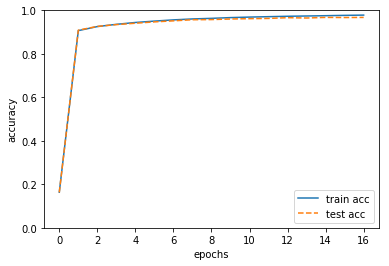

In [3]:
# coding: utf-8
import sys, os
# sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


##### 3. 수치미분

0.1999999999990898


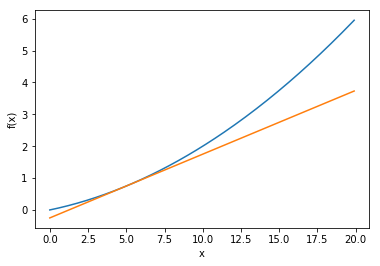

In [4]:
# 수치미분
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


##### 4. 기울기
- cf) 편미분(입력 변수 2개 이상) - Gradient

No handles with labels found to put in legend.


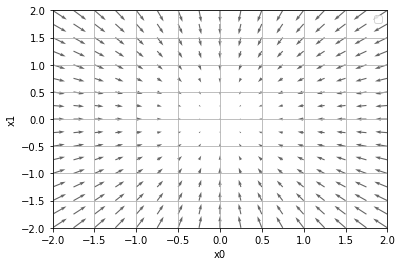

In [5]:
# 편미분
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


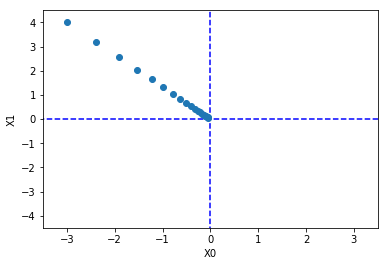

In [6]:
# 경사법 구현
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1 #rate를 조절하면서 기울기를 다르게 볼 수 있음
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

##### 5. 학습 알고리즘 구현하기
1. 미니배치 - 훈련 데이터 중 일부를 무작위로 가져옴
2. 기울기 산출 - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게 하는 방향
3. 매개변수 갱신 - 가중치 매개변수를 기울기 방향으로 조금 갱신
4. 1~3단게 반복

train acc, test acc | 0.0730333333333, 0.0707
train acc, test acc | 0.9042, 0.9067
train acc, test acc | 0.923483333333, 0.9273
train acc, test acc | 0.936716666667, 0.9394
train acc, test acc | 0.944033333333, 0.9442
train acc, test acc | 0.950683333333, 0.9491
train acc, test acc | 0.956916666667, 0.9551
train acc, test acc | 0.9601, 0.9586
train acc, test acc | 0.963933333333, 0.9611
train acc, test acc | 0.96715, 0.9623
train acc, test acc | 0.968566666667, 0.9645
train acc, test acc | 0.969083333333, 0.9669
train acc, test acc | 0.972933333333, 0.967
train acc, test acc | 0.97465, 0.9675
train acc, test acc | 0.9769, 0.9676
train acc, test acc | 0.97765, 0.9701
train acc, test acc | 0.9787, 0.969


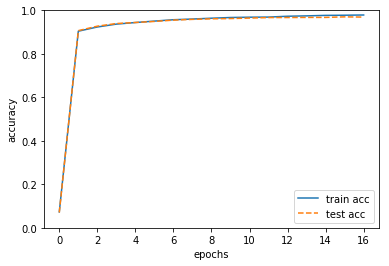

In [7]:
# 2층 신경망 클래스 구현
import sys, os
#sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

# 미니배치 학습 구현하기
import sys, os
#sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


##### Epoch
학습에서 훈련 데이터를 모두 소진했을 때의 횟수
- 10,000개 훈련데이터 100개 미니배치의 경우 >> 100회가 1 epoch
- 60,000개 훈련데이터 100개 미니배치의 경우 >> 600회가 1 epoch